<a href="https://colab.research.google.com/github/Shreya-Jayaraj/Project-Legacy/blob/main/Shreya%20Jayaraj/spam_ham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
s = ['Congrats, you have won lottery if you want money call the lottery number and get your money',
     'Give your bank details for lottery money', 'lottery for sure if bank details are verified']
s

['Congrats, you have won lottery if you want money call the lottery number and get your money',
 'Give your bank details for lottery money',
 'lottery for sure if bank details are verified']

In [2]:
s[1].split()

['Give', 'your', 'bank', 'details', 'for', 'lottery', 'money']

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words = 'english')
#stop words are english words which do no add much meaning to a sentence
op = vect.fit_transform(s).toarray()

In [4]:
op

array([[0, 1, 0, 2, 2, 1, 0, 0, 1, 1],
       [1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 0, 0, 1, 1, 0, 0]])

In [5]:
vect

CountVectorizer(stop_words='english')

In [6]:
import pandas as pd
df = pd.DataFrame(op,columns = vect.get_feature_names_out())
df

,bank,congrats,details,lottery,money,number,sure,verified,want,won
0,0,1,0,2,2,1,0,0,1,1
1,1,0,1,1,1,0,0,0,0,0
2,1,0,1,1,0,0,1,1,0,0


In [7]:
url = 'https://raw.githubusercontent.com/diazoniclabs/Machine-Learning-using-sklearn/master/Datasets/spam.tsv'

In [8]:
import pandas as pd
df = pd.read_csv(url,sep = '\t')
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [10]:
df.shape

(5572, 4)

In [11]:
df.size

22288

In [12]:
data = df['label'].value_counts()

In [13]:
df.groupby('label').size()

,0
label,
ham,4825
spam,747


<Axes: xlabel='label'>

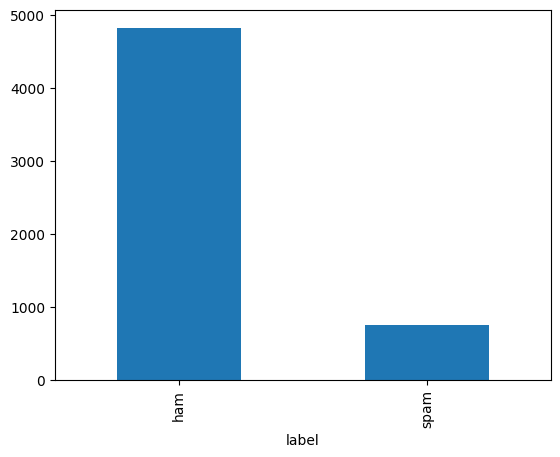

In [14]:
data.plot(kind = 'bar')

In [15]:
x = df.iloc[:,1]
y = df.iloc[:,0].values
print(x)
print(y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object
['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
x_train_v = vectorizer.fit_transform(x_train)
x_test_v = vectorizer.transform(x_test)

In [35]:
x_train

,message
872,Its going good...no problem..but still need li...
831,U have a secret admirer. REVEAL who thinks U R...
1273,Ok...
3314,"Huh... Hyde park not in mel ah, opps, got conf..."
4929,Just hopeing that wasn‘t too pissed up to reme...
...,...
4931,"Hi, the SEXYCHAT girls are waiting for you to ..."
3264,So u gonna get deus ex?
1653,For ur chance to win a £250 cash every wk TXT:...
2607,R U &SAM P IN EACHOTHER. IF WE MEET WE CAN GO ...


In [31]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train_v,y_train)

SVC()

In [36]:
y_pred = model.predict(x_test_v)
y_pred

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [39]:
y_pred[1]

'spam'